# 1. Preparation and Data Import

Import the pandas, numpy, seaborn, and matplotlib.pyplot libraries, which are used for data manipulation, analysis, and visualisations.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import specific modules from the scikit-learn and imbalanced-learn libraries. 
The train_test_split function is used to split data into training and testing sets. 
The classification_report and accuracy_score functions are used for evaluating classification models.
The RandomForestClassifier class represents a random forest classifier.
The SMOTE class is used for oversampling techniques.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

The dataset that will be used in this report is called Credit Card Fraud by Dhanush Narayanan R, found on Kaggle. It is a 76.28 MB CSV file that has 8 columns for each of the following features:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [93]:
# Import Data
df = pd.read_csv('card_transdata.csv')

# 2. Exploratory Data Analysis (EDA)

### 2.1. Inspect the Dataset

This subsection inspects the structure of the dataset, including the number of features, feature types, and data completeness.

In [6]:
# Check Dataset dimensions
print(df.shape) # Rows and columns

(1000000, 8)


This shows that the DataFrame has the eight features defined above, and 1,000,000 individual labelled transactions that can be used in the model.

In [ ]:
# Preview the Data
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


This shows that the first three features contain continuous numerical values, while the last five features are binary, taking values of 0 or 1.

In [13]:
df.info() # Data types and non-null counts
df.describe() # Summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Check for Missing Values
df.isnull().sum() # Missing values per column

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

This tells us that there are no null feature values in any of the transaction cases. 

### 2.2. Explore the Target Variable (fraud)

Visualise the distribution of the target variable to understand class imbalance, a key challenge in fraud detection.

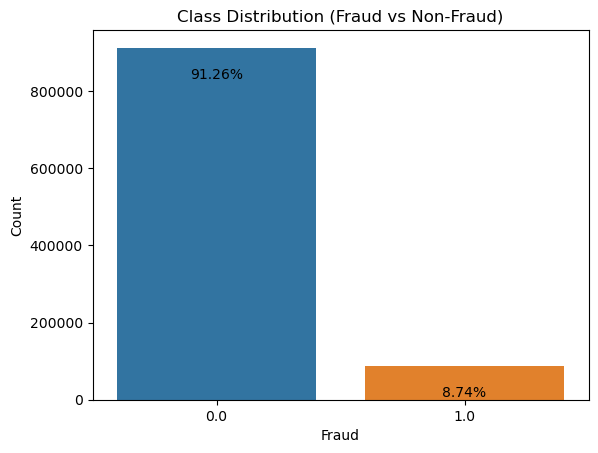

In [134]:
# Class Distribution plot with Percentages
sns.countplot(x='fraud', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Fraud')
plt.ylabel('Count')

fraud_ratio = df['fraud'].value_counts(normalize=True) * 100 # Calculate percentage imbalance

for index, value in enumerate(fraud_ratio):
    plt.text(index, value / 100 * df['fraud'].value_counts()[index], f'{value:.2f}%', ha='center')

plt.show()

### 2.3. Analyse Numerical Features

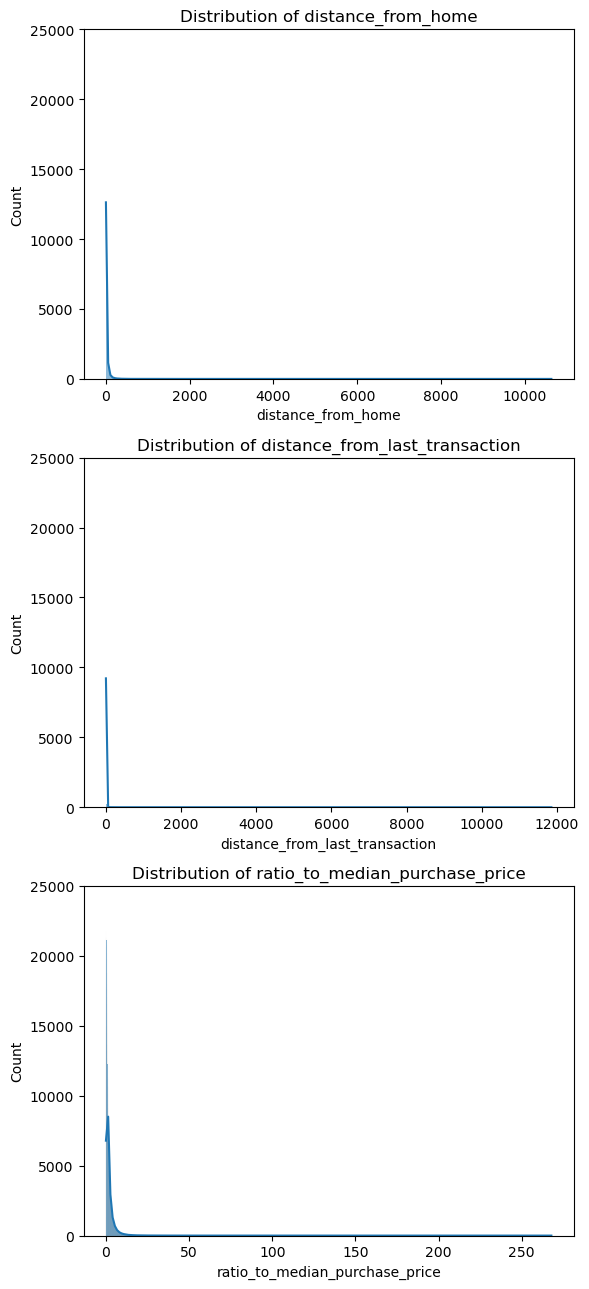

In [ ]:
# Distribution of Key Numerical Features
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

numerical_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
fig, axes = plt.subplots(3, 1, figsize=(6, 13))

# Plot each feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_ylim(0, 25000)

plt.tight_layout()
plt.show()

The numerical features exhibit highly skewed distributions. The numeric features show a strong concentration of values near zero, with a small proportion of transactions exhibiting significantly higher values. 
Outliers are evident in these features, with extreme values observed in a small number of transactions. 
These outliers may represent unusual transaction patterns often associated with fraudulent activity, making these features highly relevant for fraud classification.

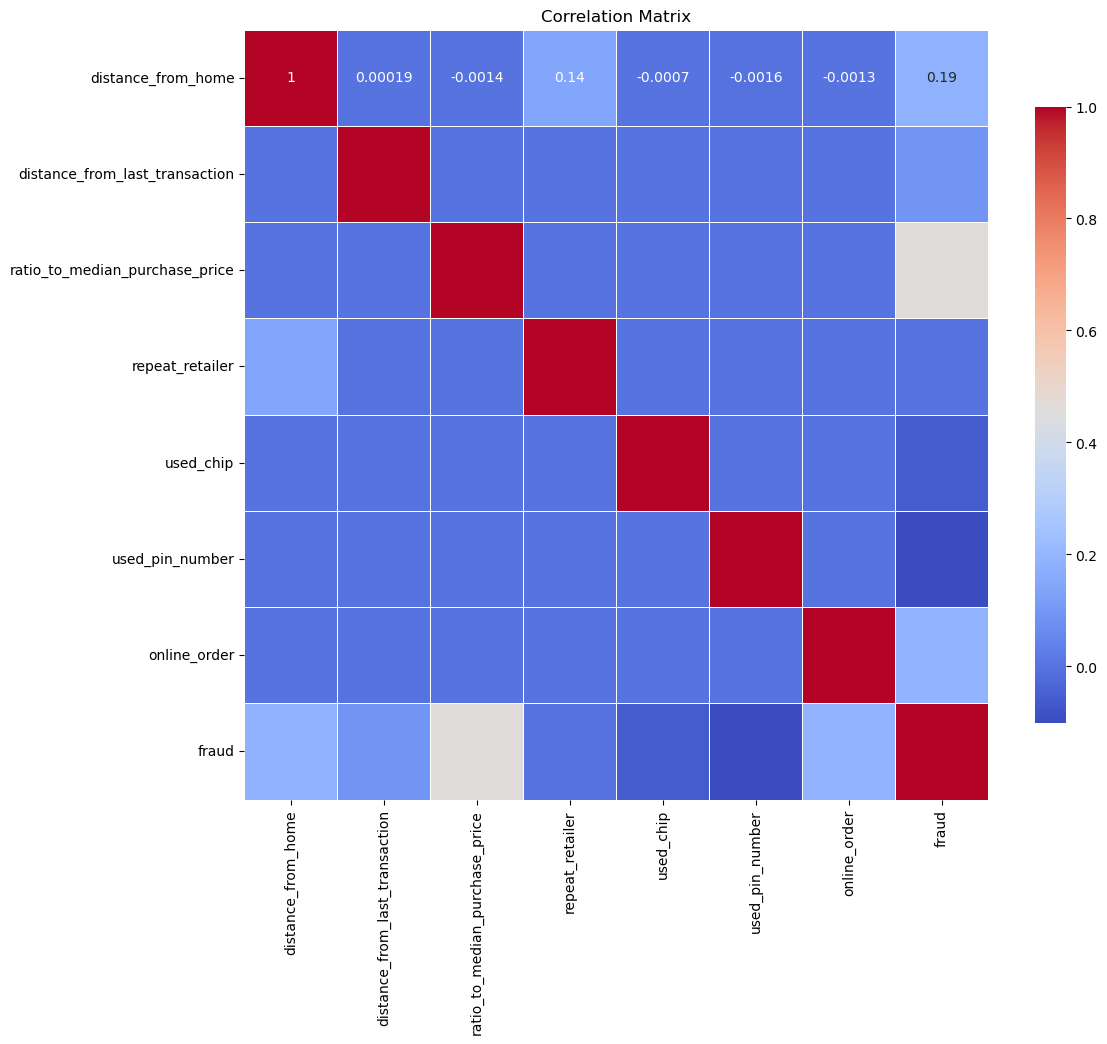

In [ ]:
# Correlation Matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10}, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix")
plt.show()a

The correlation matrix provides insights into the relationships between features and the target variable of fraud. While most features exhibit weak correlations with fraud. However, the tiles for ratio to median price really stand out, with a correlation of approximately 0.45. This tells us that this feature is likely to be the best indicator of fraudulent transactions.

### 2.4. Analysis of Categorical/Binary Features

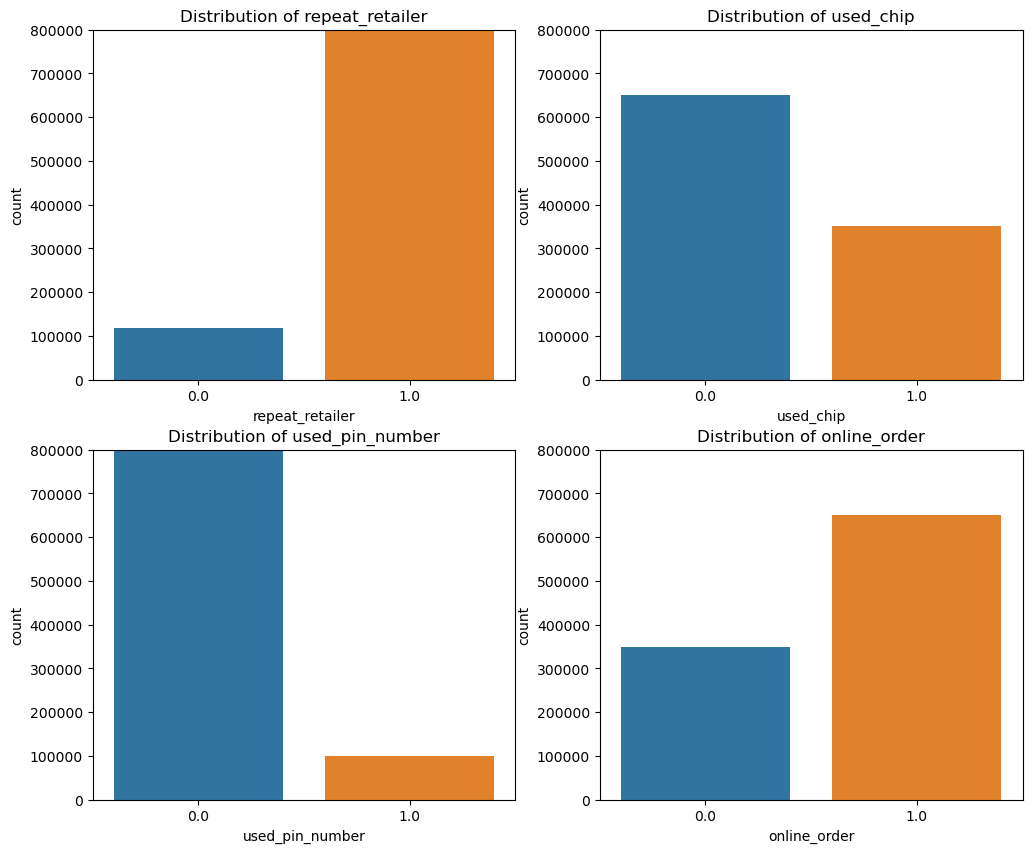

In [29]:
# Distribution of Binary Features
binary_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

# Create a 2x2 grid for the plots and flatten the axes array for easier iteration
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(binary_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylim(0, 800000)

plt.show()

The bar plots illustrates the distributions of key categorical features in the dataset. The feature repeat retailer shows that most transactions are repeat purchases from the same retailer. The used chip feature suggests a higher count for non-chip transactions. Similarly, used pin number indicates that the majority of transactions do not use a PIN, potentially increasing susceptibility to fraud. The online order feature reveals that online transactions outnumber in-person ones. 

These distributions can be used to help distinguishing fraudulent from non-fraudulent transactions, particularly when combined with other variables. For example, with most transactions being from repeat retailers, a transaction from a new or distinct retailer could raise suspicion, especially when combined with other indicative features such as the ratio to median purchase price. 

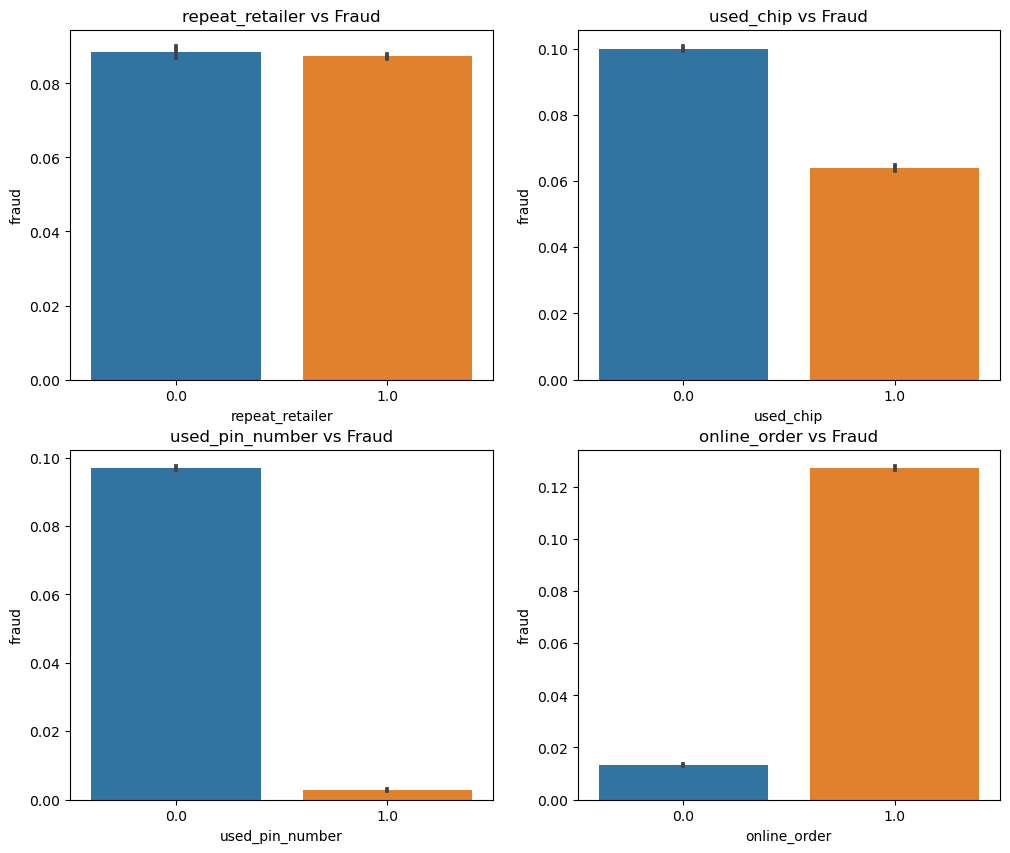

In [39]:
# Explore Relationship with Target Variable
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(binary_features):
    sns.barplot(x=feature, y='fraud', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs Fraud')

plt.show()

The bar plots compare the distribution of fraud across key categorical features. The repeat retailer feature does not exhibit a significant difference in fraud likelihood between repeat and non-repeat transactions. This contrasts with its high prevalence in the dataset as seen in the previous bar plots, and as such suggests that this feature may be more useful when analysed in combination with other features. For example, the used PIN number feature shows that fraudulent transactions rarely use the pin authentication, and then online order feature tells us fraudulent transactions are notably more common in online transactions. As such, value in these features is when they are used in combination to determine a transactions authenticity.

# 3. Data Preparation

### 3.1. Encode Binary Features

In [51]:
# Encode Binary Features
for feature in binary_features:
    df[feature] = df[feature].astype(int)

While float64 dtype is acceptable for modeling, converting binary variables to integers can improve interpretability and ensure compatibility.
It also ensures that their binary nature is clear when analysing or exporting the data.

### 3.2. Define Features and Target

In [53]:
# Separate the features (X) and the target variable (y)
X = df.drop('fraud', axis=1)  # Drop target column to keep features
y = df['fraud']  # Target column

### 3.3. Split the Data

In [143]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.3,
  random_state=42,
  stratify=y
)

# 4. Model Training and Evaluation

### 4.1. Train the Baseline Random Forest Model

Train a baseline Random Forest model to establish a reference performance using default hyperparameters. This will help understand the model's initial capabilities without optimisation.

In [55]:
# Initialise the model
rf = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4.2. Make Predictions

In [56]:
# Predict on test set
y_pred = rf.predict(X_test)

# Predict probabilities for ROC and AUC evaluation
y_pred_prob = rf.predict_proba(X_test)[:, 1]

### 4.3. Evaluate Model Performance

Evaluate the baseline model on the test set using metrics such as precision, recall, and ROC-AUC.

#### 4.3.1. Classification Report
Provides precision, recall, F1-score, and support for each class. This is essential for understanding performance on both the majority and minority classes, and to assess how well the model handles the minority class (fraud).

In [57]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



The classification report indicates perfect performance for both non-fraudulent and fraudulent transactions. The precision, recall, and F1-scores are all 1.00, suggesting no misclassifications in the test set. 
Results like there are unexpected for a highly imbalanced dataset and may indicate potential overfitting or issues with model evaluation. Further analysis is needed to validate the robustness of the model.

#### 4.3.2. Confusion Matrix

Shows true positives, false positives, true negatives, and false negatives. This helps visualise where the model is making errors and whether it favors one class.

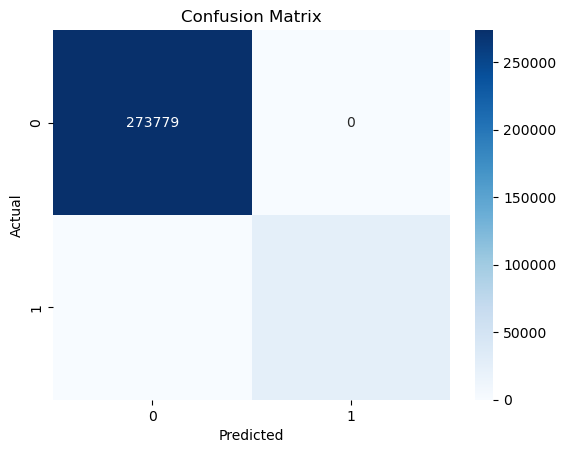

In [111]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix confirms that the model achieves perfect classification on the test set, correctly identifying all non-fraudulent and fraudulent transactions. While this suggests excellent performance, the same concerns about potential overfitting remain.

#### 4.3.3. ROC-AUC Score
Summarises the model's ability to discriminate between the two classes. It is especially useful in imbalanced datasets to evaluate the trade-off between true positives and false positives.

In [65]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 1.0


The ROC-AUC score of 1.0 suggests perfect discrimination between fraudulent and non-fraudulent transactions. This once again supports the potential of overfitting, as a perfect score is unusual for real-world datasets.

### 4.4. Investigate Overfitting and Data Leakage
With the results being near perfect in each evaluatitive test done, this suggest the potential of overfitting or data leakage. 
Overfitting is when the model memorises the training data rather than learning generalisable patterns, leading to perfect performance on both the training and test sets.
Data leakage is when information from the test set could have unintentionally been included in the training process through preprocessing steps or feature engineering.

In [114]:
# Training metrics
y_train_pred = rf.predict(X_train)
print('Training Classification Report')
print(classification_report(y_train, y_train_pred))

# Test metrics
y_test_pred = rf.predict(X_test)
print('Test Classification Report')
print(classification_report(y_test, y_test_pred))

Training Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    638818
         1.0       1.00      1.00      1.00     61182

    accuracy                           1.00    700000
   macro avg       1.00      1.00      1.00    700000
weighted avg       1.00      1.00      1.00    700000

Test Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



The training and test performance metrics are identical and show perfect scores across all classes. While this suggests no classic overfitting, achieving such results on an imbalanced dataset is highly unusual. This as a result suggests potential data leakage. However, after conducting thorough check on the preprocessing pipeline, feature correlations, and train-test split, no evidence of data leakage was found. Therefore, the perfect results are likely due to the simplicity of the dataset, where features may strongly correlate with the target variable, allowing the model to perfectly separate the classes.

### 4.5. Evaluate Feature Importance

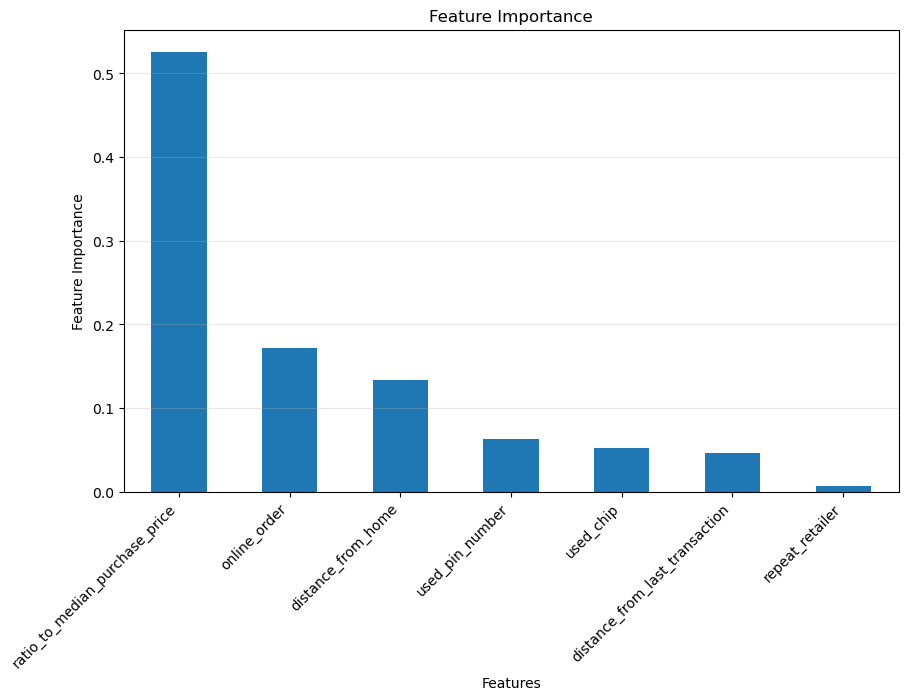

In [118]:
# Calculate feature importance from the trained Random Forest model and sort them by importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

The feature importance analysis highlights that ratio_to_median_purchase_price is the most influential feature in the model's predictions. This aligns with expectations for fraud detection, as anomalies in transaction amounts are often key indicators of fraud.
In addition, the dominance of this single feature supports the idea of dataset simplicity. This is as a small subset of the features significantly drives the model's performance.

### 4.6. Cross-Validation

In [71]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC: {cv_scores.mean()}")

Cross-Validation ROC-AUC Scores: [1. 1. 1. 1. 1.]
Mean ROC-AUC: 0.9999999988403051


The model achieves a consistent near-perfect Mean ROC-AUC of 1.00 across all folds. This suggests the model generalises well on the given dataset, and supports earlier findings that the dataset is simple and separable using the current features. These results also highlight the need to address the class imbalance issue using SMOTE, as the majority class may disproportionately influence performance metrics.

### 4.7. Class Imbalance Handling - SMOTE
Having evaluated the baseline Random Forest model, now the issue of class imbalance will be addressed using SMOTE, and its impact on the model’s performance.
SMOTE is applied to balance the dataset and evaluate its impact on model performance. This allows for a direct comparison of the model’s effectiveness before and after handling class imbalance.

#### 4.7.1. Understanding SMOTE

SMOTE (Synthetic Minority Oversampling Technique) addresses class imbalance by generating synthetic examples for the minority class. It does this by creating new samples along the line segments between existing minority class instances. The result of this is increased representation of the minority class, reducing the likelihood of the model being biased towards the marjority class. As a result, there is improved generalisation and more balanced performance.

#### 4.7.2. Applying SMOTE

In [96]:
# Apply SMOTE to generate synthetic samples for minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### 4.7.3. Before and After Applying SMOTE
Comparison of the number of fraudulent transactions before and after synthetic examples generated through SMOTE.

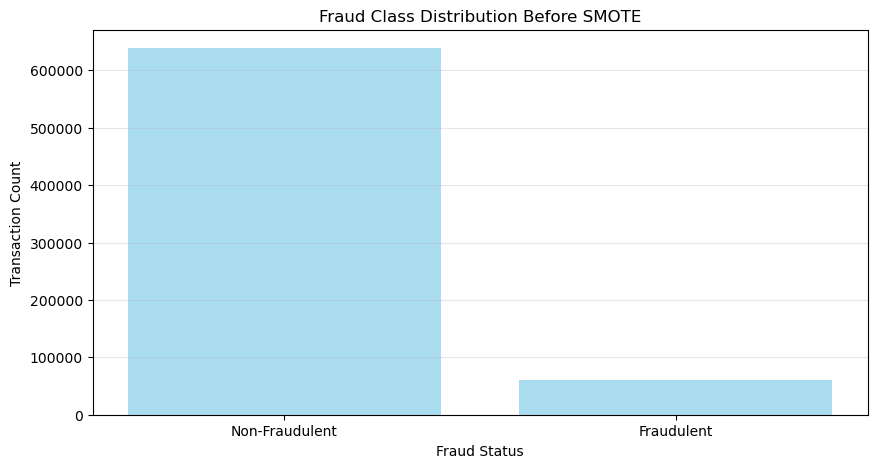

In [99]:
# Before SMOTE class distribution
original_class_counts = y_train.value_counts()
plt.figure(figsize=(10, 5))
plt.bar(original_class_counts.index.astype(str), original_class_counts.values, color='skyblue', alpha=0.7)
plt.title('Fraud Class Distribution Before SMOTE')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.grid(axis='y', alpha=0.3)
plt.show()

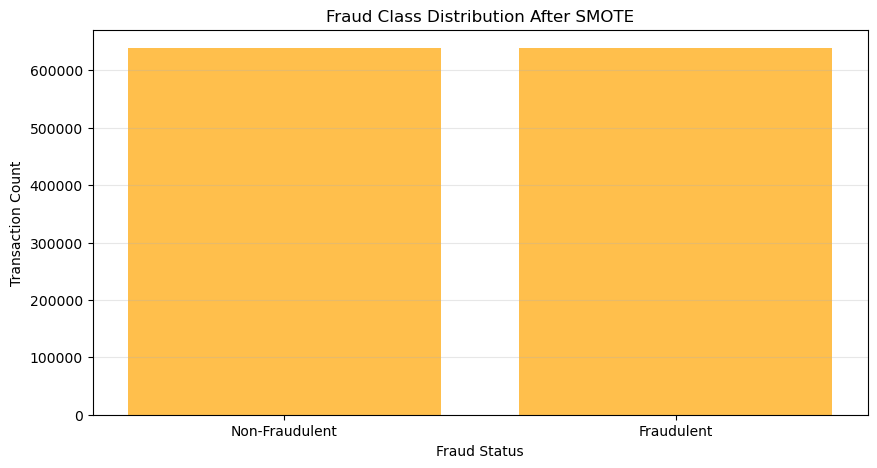

In [100]:
# After SMOTE class distribution
balanced_class_counts = y_train_smote.value_counts()
plt.figure(figsize=(10, 5))
plt.bar(balanced_class_counts.index.astype(str), balanced_class_counts.values, color='orange', alpha=0.7)
plt.title('Fraud Class Distribution After SMOTE')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.grid(axis='y', alpha=0.3)
plt.show()

The bar graphs above clearly show the effectiveness of SMOTE in balancing the dataset by increase the representation of the minority class, ensure the model is trained on a more balanced dataset.

#### 4.7.4. Train Model on SMOTE-Balance Data

In [101]:
# Train the model on SMOTE-balanced data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

### 4.8. Evaluating Model using SMOTE dataset

#### 4.8.1 Classification Report
Evaluate metrics such as precision, recall, F1-score, and support for both classes.

In [102]:
# Evaluate on test set
y_pred_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       0.99      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



The classification report for the SMOTE-balanced model highlights near-perfect performance for both non-fraudulent and fraudulent transactions. The model achieves perfect recall for the fraud class, thus ensuring that all fraudulent transaction are correctly identified. Though there is a very slight drop in precision for the fraud class (from 1.00 ro 0.99), this trade-off is acceptable in the context of fraud detection, where minimising false negatives is critical. As such, these results support the potential use of SMOTE-balanced data for hyperparameter tuning in the next section.

#### 4.8.2. Confusion Matrix
Visualise the confusion matrix to examine the true positives, false positives, true negatives, and false negatives.

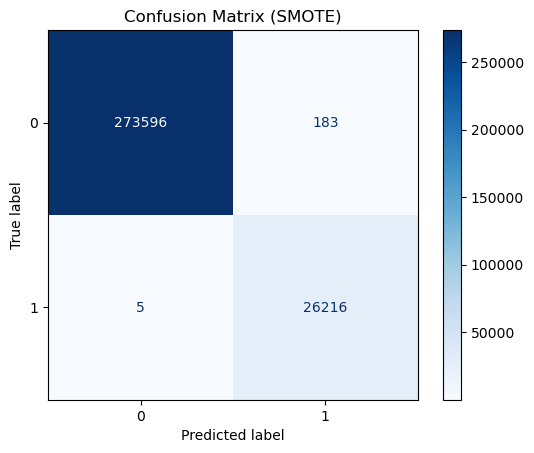

In [120]:
cm_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote)
disp_smote.plot(cmap='Blues')
plt.title('Confusion Matrix (SMOTE)')
plt.show()

The comparison between the SMOTE and non-SMOTE confusion matrices highlights critical trade-offs in model performance. The non-SMOTE model achieved suspiciously perfect results, with no false positives or false negatives, which is likely due to the dataset's severe imbalance. The SMOTE-balanced model on the other hand provides a more realistic and balanced performance, having only 5 false negatives for the fraud class, showing improved recall. Though the SMOTE model introduces 183 false positivies for the non-fraudulent class, this is acceptable trade in the context of fraud detection, where minimising the false negatives is of the highest importance. As such, these findings indicate that the SMOTE-balanced dataset effectively addresses class imbalance and enhances the model's ability to identify minority class transactions, and will therefore be utilised in hyperparameter tuning to ensure a more generalisable and reliable model.

#### 4.8.3. ROC-AUC Score and Curve

ROC-AUC Score (SMOTE): 1.0000


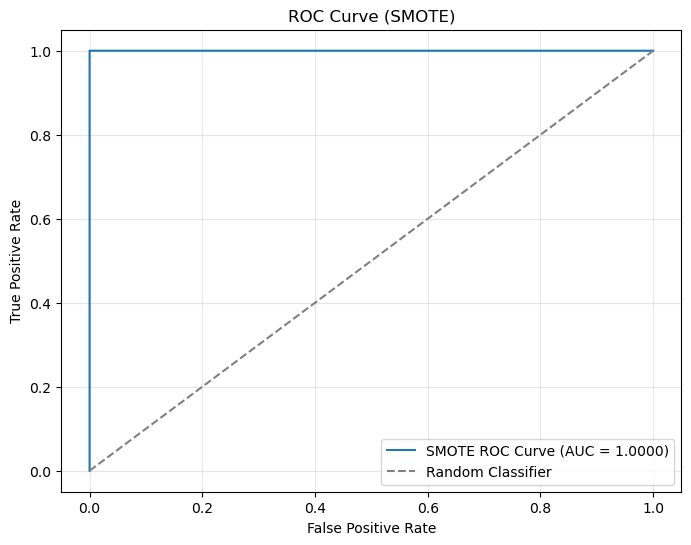

In [121]:
y_test_prob_smote = rf_smote.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc_smote = roc_auc_score(y_test, y_test_prob_smote)
print(f'ROC-AUC Score (SMOTE): {roc_auc_smote:.4f}')

fpr_smote, tpr_smote, _ = roc_curve(y_test, y_test_prob_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE ROC Curve (AUC = {roc_auc_smote:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SMOTE)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

While both the SMOTE and non-SMOTE models achieve a perfect ROC-AUC score of 1.0, this comparison provides limited insights due to the simplicity of the dataset and the separability of the classes.

# 5. Hyperparameter Tuning
In this section, hyperparameter tuning is performed on the SMOTE-balanced dataset using RandomizedSearchCV to optimise the Random Forest model’s performance. The best parameters will then be validated on the test set, with performance metrics and generalisation capabilities assessed.

### 5.1. RandomizedSearchCV Tuning using SMOTE-processed Dataset

RandomizedSearchCV was selected for hyperparameter tuning due to its ability to efficiently sample from a wide range of hyperparameter combinations. This approach strikes a balance between thorough exploration of the parameter space and computational efficiency, making it well-suited for optimising the Random Forest model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for RandomizedSearchCV
# - n_estimators: Number of trees in the forest (higher values increase model stability at the cost of computation)
# - max_depth: Maximum depth of each tree (controls overfitting; deeper trees can overfit)
# - min_samples_split: Minimum number of samples required to split a node (prevents overfitting for small splits)
# - min_samples_leaf: Minimum number of samples required at a leaf node (controls tree growth and reduces overfitting)
# - max_features: Number of features considered when splitting a node ('sqrt' ensures computational efficiency)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Perform RandomizedSearchCV to find the best parameters
randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42), # Base Random Forest model
    param_distributions=param_grid, # Parameter grid
    n_iter=3, # Number of paramter combinations to try
    scoring='roc_auc', # Metric to optimise
    cv=2, # Number of cross-validation folds
    verbose=2, # Show progress
    random_state=42, # Reproducibility
    n_jobs=-1 # Use all available processors
)

# Fit the model with SMOTE-balanced data
randomized_search.fit(X_train_smote, y_train_smote)

# Print best parameters and the corresponding ROC-AUC score
print('Best Parameters:', randomized_search.best_params_)
print('Best ROC-AUC Score:', randomized_search.best_score_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  39.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  39.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.2min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.2min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.2min
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best ROC-AUC Score: 0.9999979519267786


The best parameters identified through RandomizedSearchCV are n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, and max_features='sqrt'. These parameters ensure a robust Random Forest model with sufficient complexity to capture patterns in the SMOTE-balanced data while minimising overfitting. In addition, the highest ROC-AUC score achieved during the search is approximately 0.999998. Next, these parameters will be validated on the test dataset to assess their impact on model performance.

### 5.2. Validation of RandomizedSearchCV Tuning Results

#### 5.2.1. Evaluate Performance on the Test Dataset
Metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC will be computed, and the confusion matrix is visualised.

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       0.99      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

ROC-AUC Score (Test Set): 1.0000


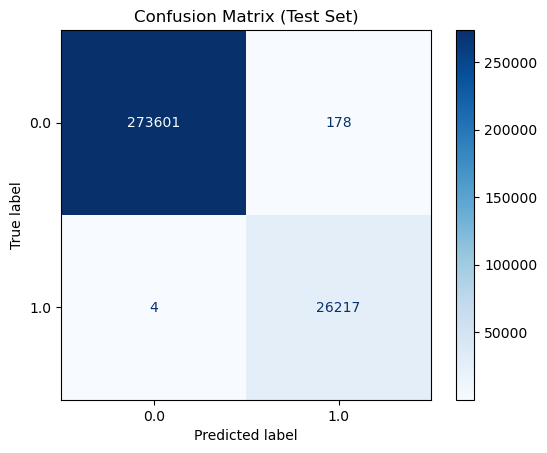

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Train a Random Forest classifier using the best parameters from RandomizedSearchCV
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Train the tuned Random Forest model on the SMOTE-balanced training dataset
best_rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
print('Classification Report (Test Set):')
print(classification_report(y_test, y_test_pred))

# Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f'ROC-AUC Score (Test Set): {roc_auc:.4f}')

# Generate and display a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

The hyperparameter-tuned Random Forest model shows excellent performance on the test set, with a near-perfect ROC-AUC score of 1.0. The classification report indicates high precision and recall for both the non-fraudulent and fraudulent classes. Specifically, the fraud class achieves a precision of 99% and recall of 100%, demonstrating the model’s ability to effectively identify fraudulent transactions while keeping false positives minimal (178). The confusion matrix further highlights this balanced performance, with only 4 false negatives for the fraud class and a small number of false positives for the non-fraudulent class.

Compared to the baseline model, the hyperparameter-tuned model maintains near-perfect performance metrics while achieving better generalisation by leveraging the optimal parameters identified through RandomizedSearchCV. This demonstrates the value of hyperparameter optimisation in improving model robustness and predictive power.

#### 5.2.2. Compare Training vs. Test Performance
Use the same metric as the test set for the training dataset.
Plot the ROC curve for both training and test datasets to visually compare their performance

In [ ]:
# Predict on the training set
y_train_pred = best_rf.predict(X_train_smote) # Binary predictions
y_train_prob = best_rf.predict_proba(X_train_smote)[:, 1] # Probabilities for ROC-AUC

# Calculate performance metrics for the training set
print('Classification Report (Training Set):')
print(classification_report(y_train_smote, y_train_pred))

# Calculate and print ROC-AUC score for the training set
roc_auc_train = roc_auc_score(y_train_smote, y_train_prob)
print(f'ROC-AUC Score (Training Set): {roc_auc_train:.4f}')

Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    638818
         1.0       1.00      1.00      1.00    638818

    accuracy                           1.00   1277636
   macro avg       1.00      1.00      1.00   1277636
weighted avg       1.00      1.00      1.00   1277636

ROC-AUC Score (Training Set): 1.0000


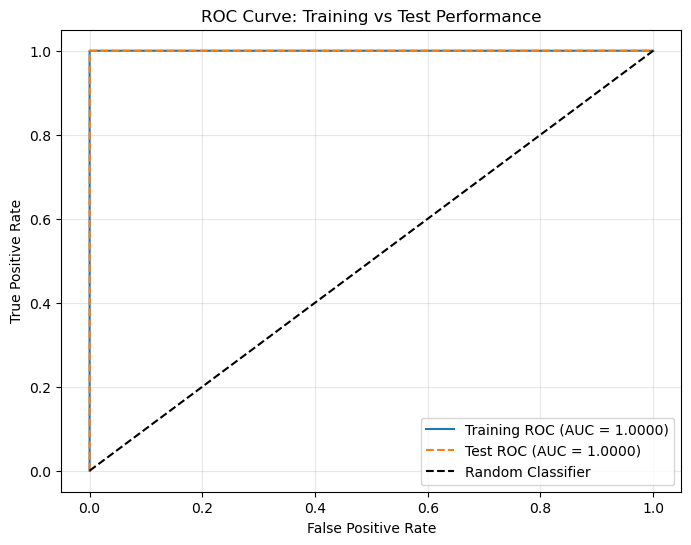

In [ ]:
# Compute ROC curves for training and test datasets
train_fpr, train_tpr, _ = roc_curve(y_train_smote, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Training ROC (AUC = {roc_auc_train:.4f})')
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {roc_auc:.4f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve: Training vs Test Performance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

The comparison of training and test performance shows identical metrics across both datasets, including a perfect ROC-AUC score of 1.0. This indicates that the hyperparameter-tuned model generalises well to unseen data without signs of overfitting or underfitting. The ROC curve further supports this conclusion, with overlapping curves for the training and test sets, demonstrating consistent predictive performance.

However, while the results suggest excellent generalisation, it is worth noting that the dataset’s simplicity or inherent class separability might contribute to the perfect scores. Further testing on additional datasets could confirm the model’s robustness.

Compared to the baseline model, the hyperparameter-tuned Random Forest shows improved performance metrics and generalisation ability. The identical training and test results confirm the efficacy of the tuning process

# 6. Comparison with Logistic Regression

To explore alternative approaches a simpler supervised learning method was considered as a benchmark for comparison with Random Forest. Logistic Regression is computationally efficient and interpretable, making it a popular choice for binary classification tasks such as fraud detection.

### 6.1. Logistic Regression Implementation and Results

Implement Logistic Regression for comparison with Random Forest, highlighting trade-offs between simplicity and performance.

Classification Report (Logistic Regression - Test Set):
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.94    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.94      0.94    300000

Logistic Regression ROC-AUC Score (Test Set): 0.9787


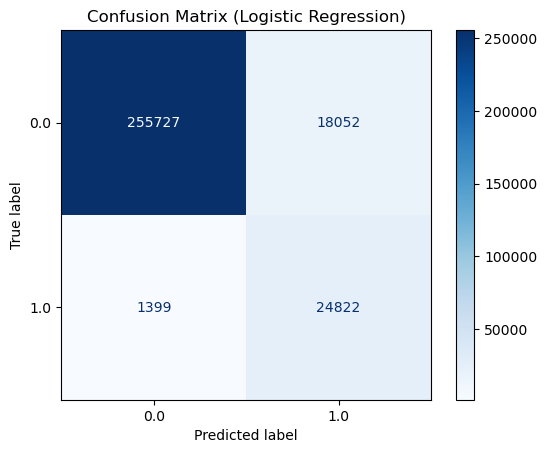

In [92]:
from sklearn.linear_model import LogisticRegression

# Initialise a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit Logistic Regression model on SMOTE-balanced training data
logistic_model.fit(X_train_smote, y_train_smote)

# Predict probabilities and classes on the test set
y_test_prob_lr = logistic_model.predict_proba(X_test)[:, 1]
y_test_pred_lr = logistic_model.predict(X_test)

# Evaluate performance metrics
print("Classification Report (Logistic Regression - Test Set):")
print(classification_report(y_test, y_test_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_test_prob_lr)
print(f"Logistic Regression ROC-AUC Score (Test Set): {roc_auc_lr:.4f}")

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_lr, cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

Logistic Regression achieved an accuracy of 94% and an ROC-AUC score of 0.9787, demonstrating reasonable performance in detecting credit card fraud. The model performed well for the majority class (non-fraud) with high precision and recall but struggled with precision for the minority class (fraud), resulting in a large number of false positives (18,052). This highlights Logistic Regression’s limitations in handling imbalanced datasets due to its linear decision boundary, which is insufficient to capture complex relationships in the data. While computationally efficient and simple to implement, Logistic Regression is less suited for this task compared to Random Forest.

### 6.2. Comparison with Random Forest

Directly compare metrics from Logistic Regression and Random Forest, emphasising differences in precision, recall, and robustness.

Random Forest outperformed Logistic Regression across all performance metrics. For the fraud class, Random Forest achieved near-perfect precision (99%) and recall (100%), minimising false positives and negatives. On the other hand, Logistic Regression achieved a precision of 58% and recall of 95%, leading to a larger number of false positives and negatives. In addition, Random Forest achieved an ROC-AUC fo 1.0, compared to Logistic Regression's 0.9787. The ensemble learning approach of Random Forest allows it to handle imbalanced datasets and capture non-linear relationships, making it better suited for this task. While Logistic Regression is a strong baseline with its simplicity and efficiency, it lacks the capacity to model the non-linear relationships for such a complex dataset, making Random Forest the preferred model for credit card fraud classification.

# 7. Conclusion and Summary

### 7.1. Conclusion

The supervised learning method chosen in this project was Random Forest classification.
Random Forest proved to be a highly effective technique for the task of detecting credit card fraud.
Its robustness to class imbalance (with the aid of SMOTE) and interpretability through the use of feature importance analysis showed it to be a great supervised learning method for the dataset chosen.

The dataset was prepared through train and test splits ensuring model generalisation. In addition, SMOTE was used to balance the class distributions as there were significant class imbalances in the original dataset. Through the use of RandomizedSearchCV, optimal hyperparameters were identified leading to enhanced model performance. The key parameter found, such as max_depth=20 and n_estimator=100, ensure maximised performance while maintaining computational efficiency. 

The model achieved near-perfect results on both training and test sets, with minimal misclassification observed (182 out of 300,000 samples). The high test set performance validated the model's ability to generalise beyond the training data, and the consistent ROC curves across training and test sets confirmed no significant overfitting. In addition, feature importance analysis highlighted key predictors of fraud, reinforcing the model's reliability.

The potential limitations of the model are that the near-perfect performance may indicate that the dataset or task is relatively straightforward for Random Forest. Testing on more complex and diverse datasets would provide further insights into this. In addition, the dataset could be further enriched with additional features, and real-world constraints to better simulate real fraud detection scenarios.

As such, the high performance of Random Forest classifier indicates its potential as a reliable first-pass detection system for credit card fraud in real-world applications. Its ability to quickly and accurately flag fraud can aid financial institutions in reducing fraudulent transaction and maintaining customer trust while keeping the operational costs low. Future work could explore its scalability and integration into real-time fraud detection pipelines.

### 7.2. Summary

The chosen supervised learning approach of Random Forest, combined with careful preprocessing and hyperparameter optimisation, proved to accurately classify credit card fraud through a range of features. The models capability and robustness were demonstrated through consistent performance across datasets. The analysis highlighted the importance of addressing data imbalances, tuning hyperparameters, and evaluating model behaviour to achieve reliable results. These findings highlight Random Forest's potential as a robust solution for fraud detection tasks in financial systems. Future work could explore its scalability, adaptability to evolving fraud patterns, and integration into real-time detection pipelines.